In [ ]:
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from shap import TreeExplainer, Explanation
from shap.plots import waterfall,beeswarm
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Imported the Dataset

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
new_df = df.drop(['CLIENTNUM',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

In [5]:
new_df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
new_df.duplicated().sum()

0

In [7]:
new_df.shape

(10127, 20)

In [8]:
# seprating the categorical columns and numerical columns for the data visualization

In [9]:
categorical_data = new_df[new_df.select_dtypes(include='object').columns]
numerical_data = new_df[new_df.select_dtypes(include=['float','int']).columns]


In [10]:
categorical_data.describe().T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [11]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [12]:
def plot_categorical_features(data,color):
    fig, ax = plt.subplots(2, 3, figsize=(18, 8))  
    ax = ax.flatten()
    cols = data.columns

    for col,ax in zip(cols,ax):
        sns.histplot(data,x=col,ax=ax,color=color)
        ax.tick_params(axis='x', rotation=90)
    
    # deleting the rest subplot
   
    fig.delaxes(ax)
    plt.tight_layout()
    plt.show()

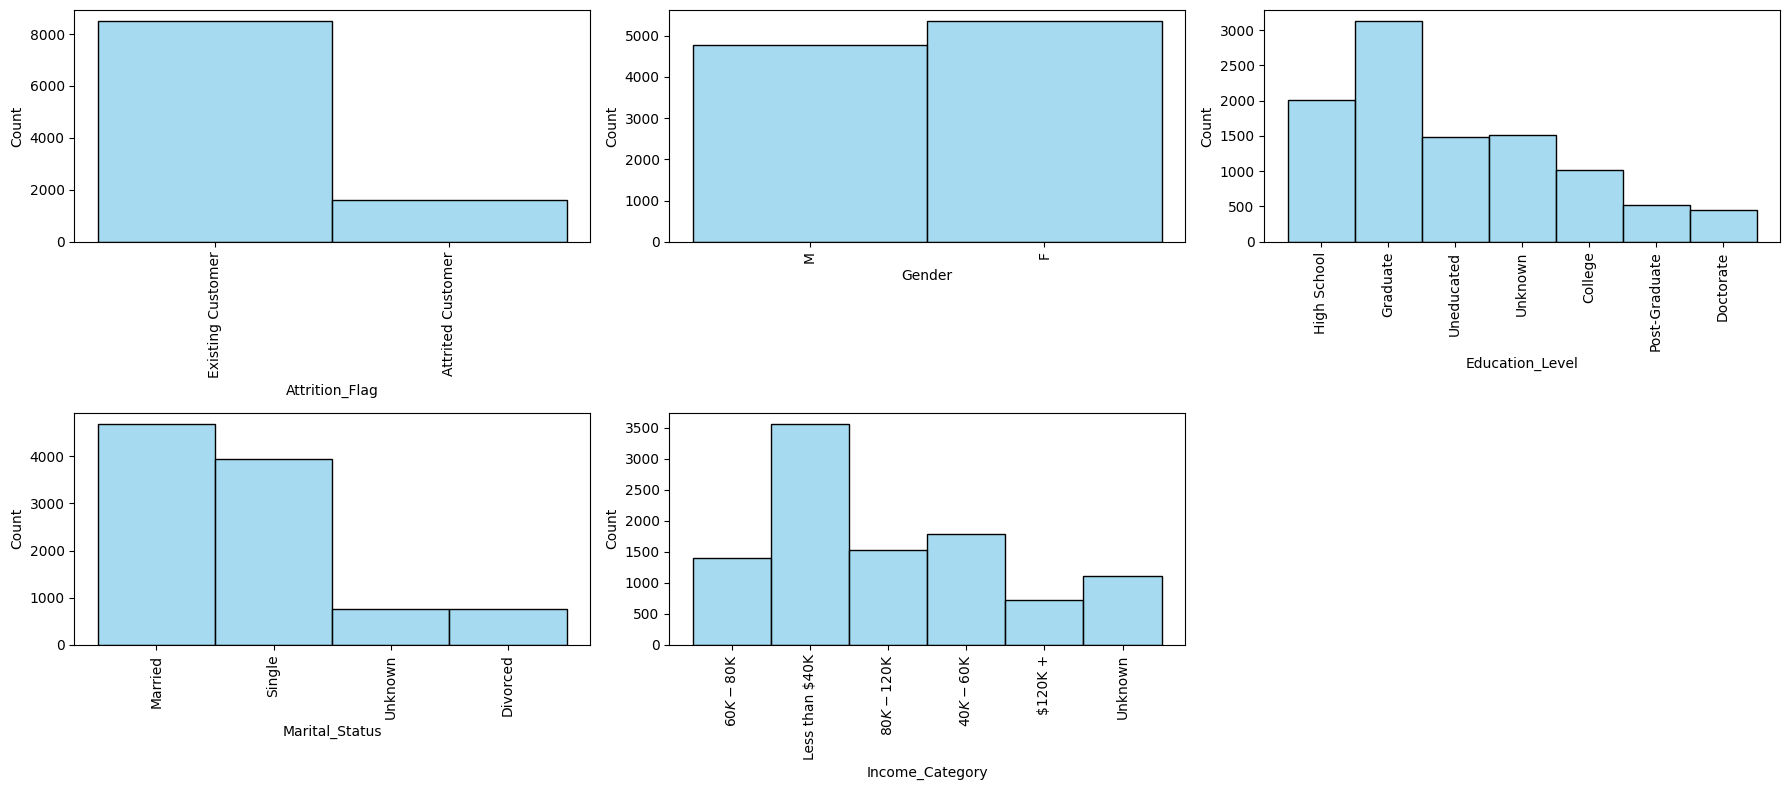

In [13]:

plot_categorical_features(categorical_data,color='skyblue')

Here the univariate analysis of categorical features is done to show the frequency of values within each feature columns to assess their distribution

In [14]:
def plot_numerical_features(data, hist_color='blue', box_color='green'):
    cols = len(data.columns)
    rows = math.ceil(cols) 
    fig, ax = plt.subplots(rows, 2, figsize=(18, rows * 4)) 
    ax = ax.reshape(-1, 2)  

    for i, col in enumerate(data.columns):
        # Plot histogram
        sns.histplot(data, x=col, color=hist_color, ax=ax[i][0])
        ax[i][0].set_title(f'Histogram of {col}')
        ax[i][0].tick_params(axis='x', rotation=90)

        # Plot boxplot
        sns.boxplot(data, x=col, color=box_color, ax=ax[i][1])
        ax[i][1].set_title(f'Boxplot of {col}')
        ax[i][1].tick_params(axis='x', rotation=90)

    # Hide any unused subplots
    for j in range(i + 1, rows):
        for k in range(2):
            fig.delaxes(ax[j][k])

    plt.tight_layout()
    plt.show()


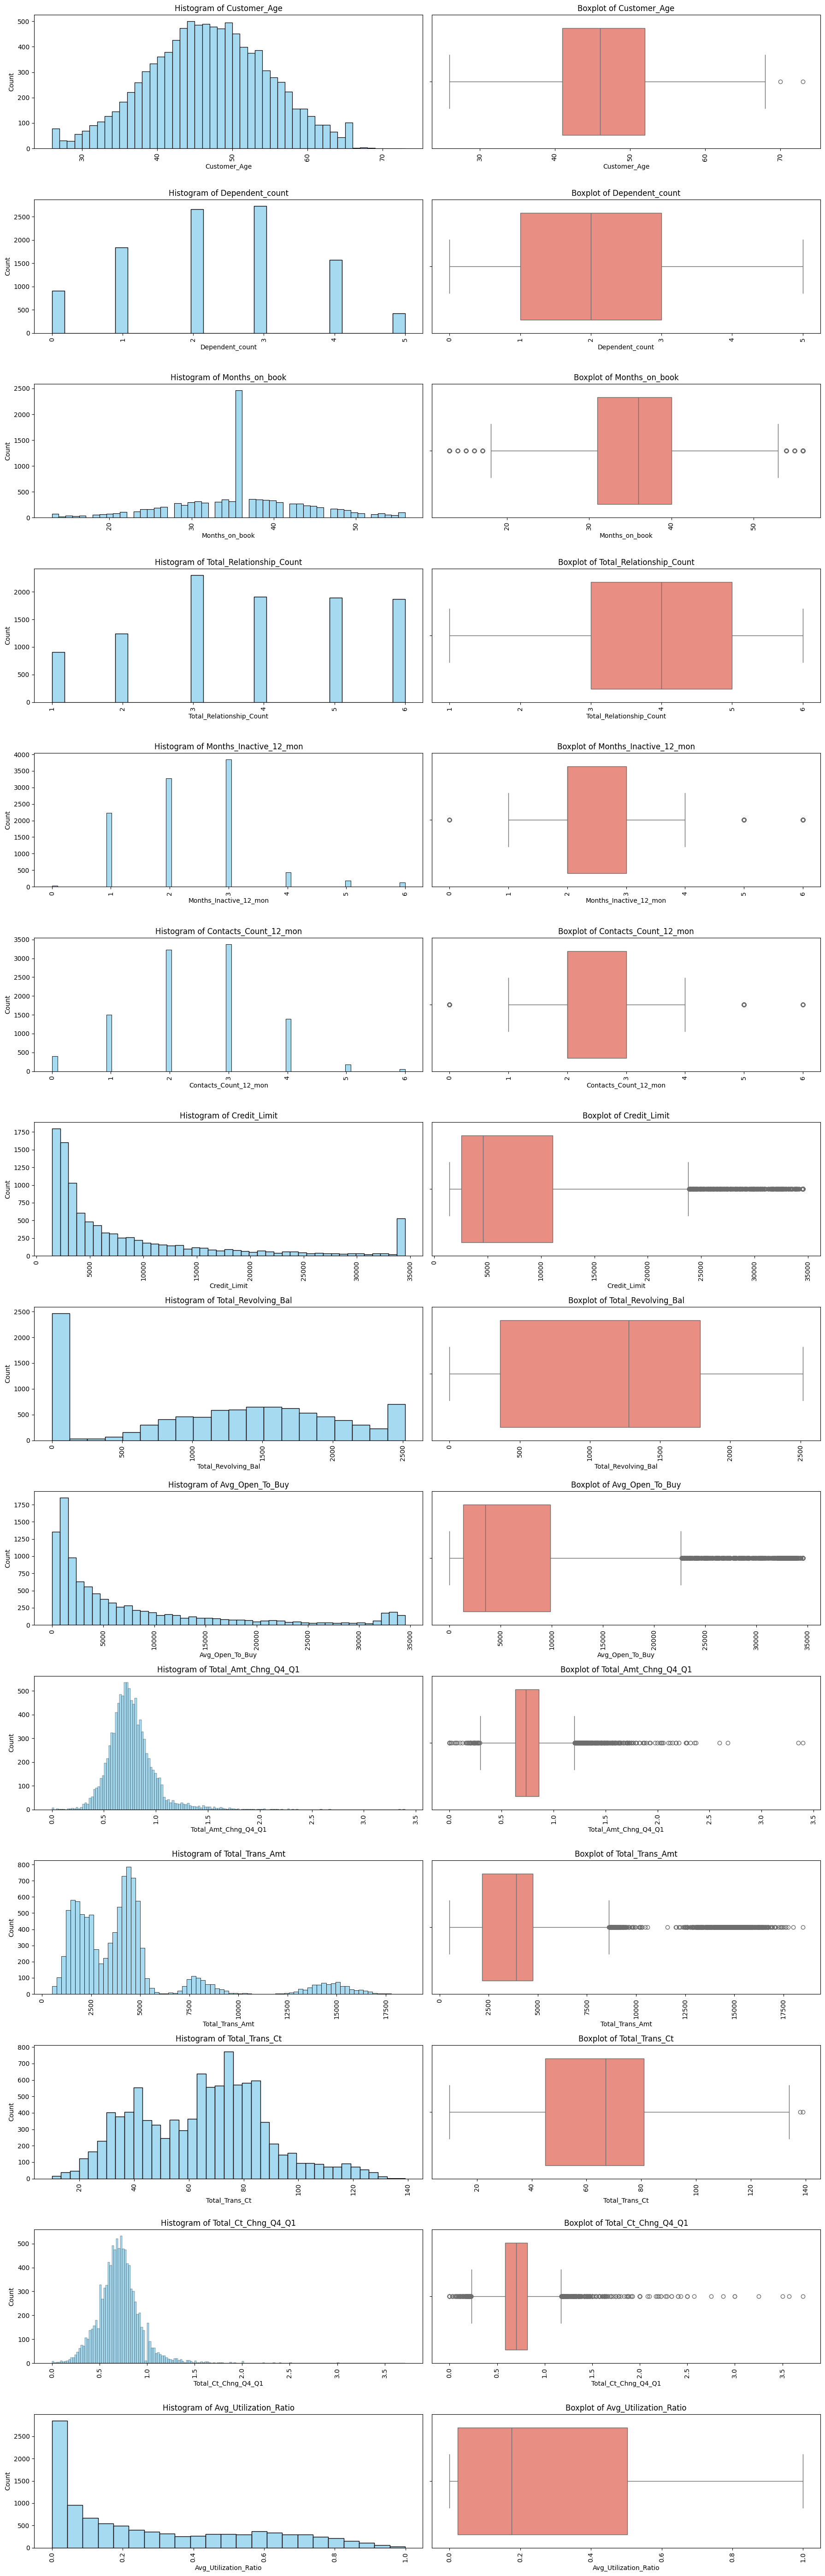

In [15]:
plot_numerical_features(numerical_data,hist_color='skyblue',box_color='salmon')

The same analysis was conducted on numerical features to evaluate their distribution patterns and identify the presence of outliers, highlighting how the data is spread and the potential impact of outliers on the overall analysis.

<AxesSubplot:xlabel='Credit_Limit', ylabel='Total_Trans_Amt'>

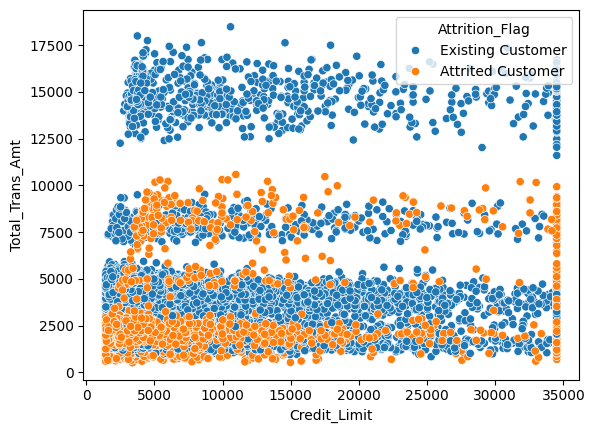

In [16]:
sns.scatterplot(data=new_df,x='Credit_Limit',y='Total_Trans_Amt',hue='Attrition_Flag')

from the above we can see that Attrited customers with higher credit limits tend to spend more, indicating that credit limit might influence their transaction behavior.While higher credit limits correspond to higher spending, it might not necessarily prevent customers churning, as customers with a credit limit of 35,000 still churn

In [17]:
Existing = new_df[new_df['Attrition_Flag'] == 'Existing Customer']
Attrition = new_df[new_df['Attrition_Flag'] == 'Attrited Customer']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


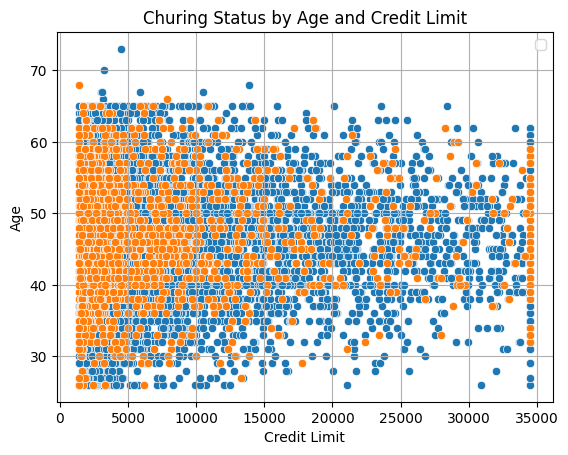

In [18]:
sns.scatterplot(data=Existing,x='Credit_Limit',y='Customer_Age')
sns.scatterplot(data=Attrition,x='Credit_Limit',y='Customer_Age')
plt.xlabel('Credit Limit')
plt.ylabel('Age')
plt.title('Churing Status by Age and Credit Limit')
plt.legend()
plt.grid(True)
plt.show()


Moderate credit limits greater than 5,000  are the most effective in keeping customers aged 30 to 60 engaged and less likely to leave. In contrast, customers with very low credit limits may feel restricted, and those with very high credit limits may have other unmet expectations, leading to higher attrition rates (churn). Essentially, the balance provided by moderate credit limits aligns better with the financial behavior and needs of this age group, improving customer retention

In [19]:
numerical_data.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

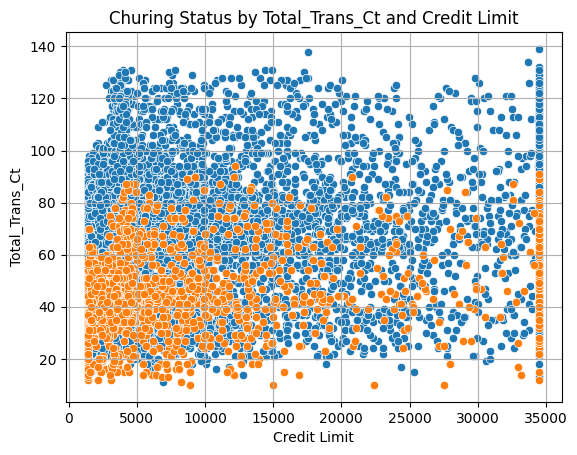

In [20]:
sns.scatterplot(data=Existing,x='Credit_Limit',y='Total_Trans_Ct')
sns.scatterplot(data=Attrition,x='Credit_Limit',y='Total_Trans_Ct')
plt.xlabel('Credit Limit')
plt.ylabel('Total_Trans_Ct')
plt.title('Churing Status by Total_Trans_Ct and Credit Limit')
# plt.legend()
plt.grid(True)
plt.show()

 Higher Transaction Counts Correlate with Retention: Across all credit limit ranges, existing customers consistently have higher transaction counts compared to attrited customers. This suggests that customers who engage more with their credit accounts (through frequent transactions) are more likely to stay. 

 
 Credit Limit Influences Activity Levels: While lower credit limits (5,000–10,000) correspond to moderate transaction activity, very high credit limits (>34,000) show an overall increase in transaction counts for both existing and attrited customers. However, retained customers in this segment still exhibit significantly higher activity levels.

In [21]:
skew_limit=0.5

skew_vals = new_df[numerical_data.columns].skew()
skew_cols = (skew_vals.sort_values(ascending=False).to_frame().rename(columns={0:'Skew'}).query('abs(Skew) > {0}'.format(skew_limit)))
skew_cols

,Skew
Total_Ct_Chng_Q4_Q1,2.064031
Total_Trans_Amt,2.041003
Total_Amt_Chng_Q4_Q1,1.732063
Credit_Limit,1.666726
Avg_Open_To_Buy,1.661697
Avg_Utilization_Ratio,0.718008
Months_Inactive_12_mon,0.633061


In [22]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Normalize skewed features
for col in skew_cols.index:
    new_df[col] = boxcox1p(new_df[col], boxcox_normmax(new_df[col] + 1))

In [23]:
print(new_df['Education_Level'].value_counts())
new_df['Education_Level'] = new_df['Education_Level'].replace({'Unknown':np.nan})
educ_imp = SimpleImputer(strategy='most_frequent')
new_df[['Education_Level']]= educ_imp.fit_transform(new_df[['Education_Level']])
new_df['Education_Level'] = new_df['Education_Level'].replace({'Uneducated':0,'High School':1,'College':2,
                                                'Graduate':3,'Post-Graduate':4,'Doctorate':5
                                                        })
print(new_df['Education_Level'].value_counts())


Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Education_Level
3    4647
1    2013
0    1487
2    1013
4     516
5     451
Name: count, dtype: int64


In [24]:
print(new_df['Income_Category'].value_counts())
new_df['Income_Category'] = new_df['Income_Category'].replace({'Unknown':np.nan})
inc_imp = SimpleImputer(strategy='most_frequent')
new_df[['Income_Category']]= inc_imp.fit_transform(new_df[['Income_Category']])
new_df['Income_Category'] = new_df['Income_Category'].replace({'Less than $40K':0,'$40K - $60K':1,'$60K - $80K':2,
                                    '$80K - $120K':3,'$120K +':4})
print(new_df['Income_Category'].value_counts())


Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Income_Category
0    4673
1    1790
3    1535
2    1402
4     727
Name: count, dtype: int64


In [25]:
print(new_df['Marital_Status'].value_counts())
new_df['Marital_Status'] = new_df['Marital_Status'].replace({'Unknown':np.nan})
mart_imp = SimpleImputer(strategy='most_frequent')
new_df[['Marital_Status']]= mart_imp.fit_transform(new_df[['Marital_Status']])
new_df['Marital_Status'] = new_df['Marital_Status'].replace({'Single':0,'Married':1,'Divorced':2})
print(new_df['Marital_Status'].value_counts())


Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


Marital_Status
1    5436
0    3943
2     748
Name: count, dtype: int64


In [26]:
print(new_df['Card_Category'].value_counts())
new_df['Card_Category'] = new_df['Card_Category'].replace({'Unknown':np.nan})
crd_imp = SimpleImputer(strategy='most_frequent')
new_df[['Card_Category']]= crd_imp.fit_transform(new_df[['Card_Category']])
new_df['Card_Category'] = new_df['Card_Category'].replace({'Blue':0,'Silver':1,'Gold':2,'Platinum':3})
print(new_df['Card_Category'].value_counts())

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
Card_Category
0    9436
1     555
2     116
3      20
Name: count, dtype: int64


In [27]:
print(new_df["Attrition_Flag"].value_counts())
new_df['Attrition_Flag']=new_df['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})
print(new_df["Attrition_Flag"].value_counts())


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64


In [28]:
print(new_df["Gender"].value_counts())
new_df['Gender']=new_df['Gender'].map({'F':0,'M':1})
print(new_df["Gender"].value_counts())

Gender
F    5358
M    4769
Name: count, dtype: int64
Gender
0    5358
1    4769
Name: count, dtype: int64


In [29]:
new_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [30]:
from sklearn.preprocessing import MinMaxScaler
for col in new_df[numerical_data.columns]:
    new_df[col] = MinMaxScaler().fit_transform(new_df[[col]])

[[1, 27910.31825010514], [2, 11008.776704153724], [3, 8916.370204206996], [4, 7187.3550255613845], [5, 6537.220109925794], [6, 6006.84322594603], [7, 5399.633982590731], [8, 5065.056388684586], [9, 4633.312461390646], [10, 4340.254634543949], [11, 4012.2879217718437], [12, 3733.899370113404], [13, 3512.425307568049], [14, 3302.6687561071885], [15, 3149.5931765189944], [16, 2996.94059306722], [17, 2859.233997924303], [18, 2763.223987338797], [19, 2638.09622059492], [20, 2532.7612437908074]]


Text(0.5, 1.0, 'Elbow Curve')

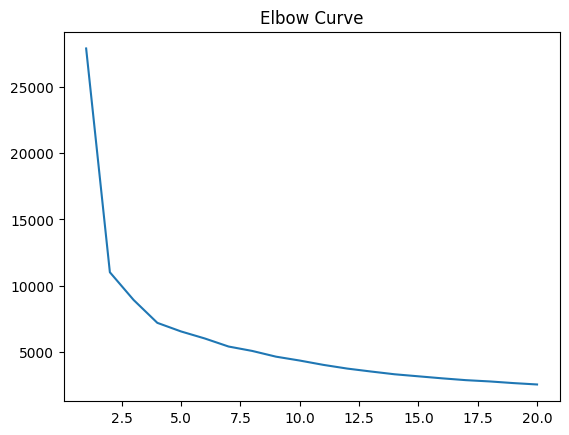

In [31]:
from sklearn.cluster import KMeans
demo_df = new_df[['Customer_Age','Gender','Income_Category','Dependent_count','Marital_Status','Total_Trans_Ct','Card_Category','Credit_Limit']]
n_clusters = 20
sse = []
for i in range(1,n_clusters+1):
    kmean = KMeans(i)
    kmean.fit(demo_df)
    sse.append([i,kmean.inertia_])
print(sse)
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])
plt.title("Elbow Curve")

In [32]:
kmean= KMeans(8)
kmean.fit(demo_df)
y_kmeans = kmean.predict(demo_df)
demo_df['Cluster']= y_kmeans
demo_df = pd.DataFrame(demo_df)
demo_df['Cluster']= y_kmeans

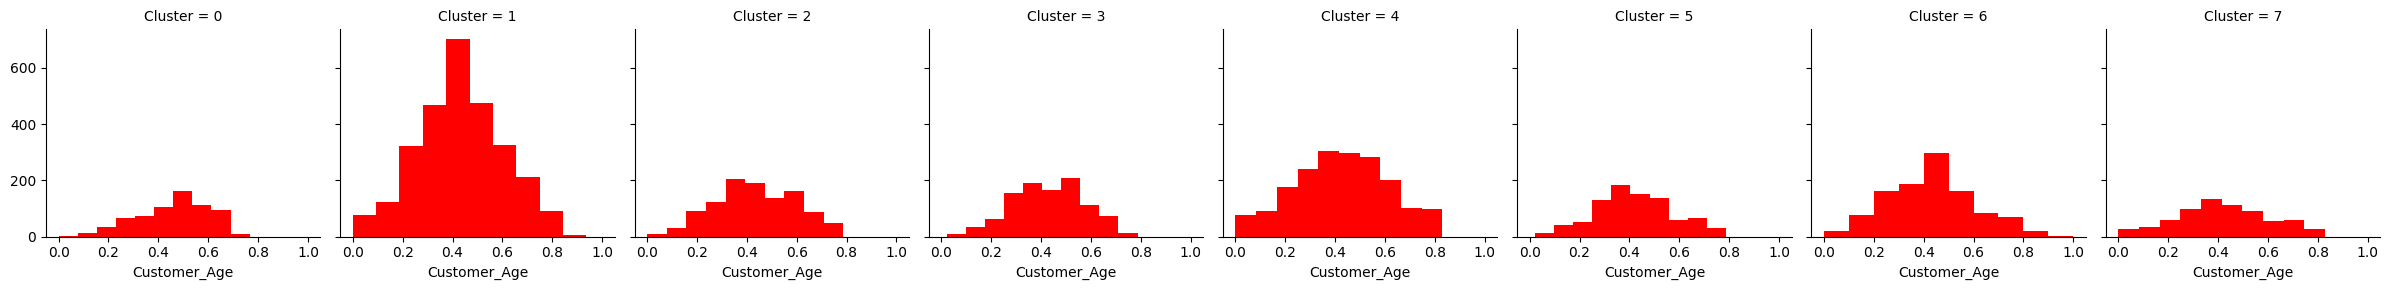

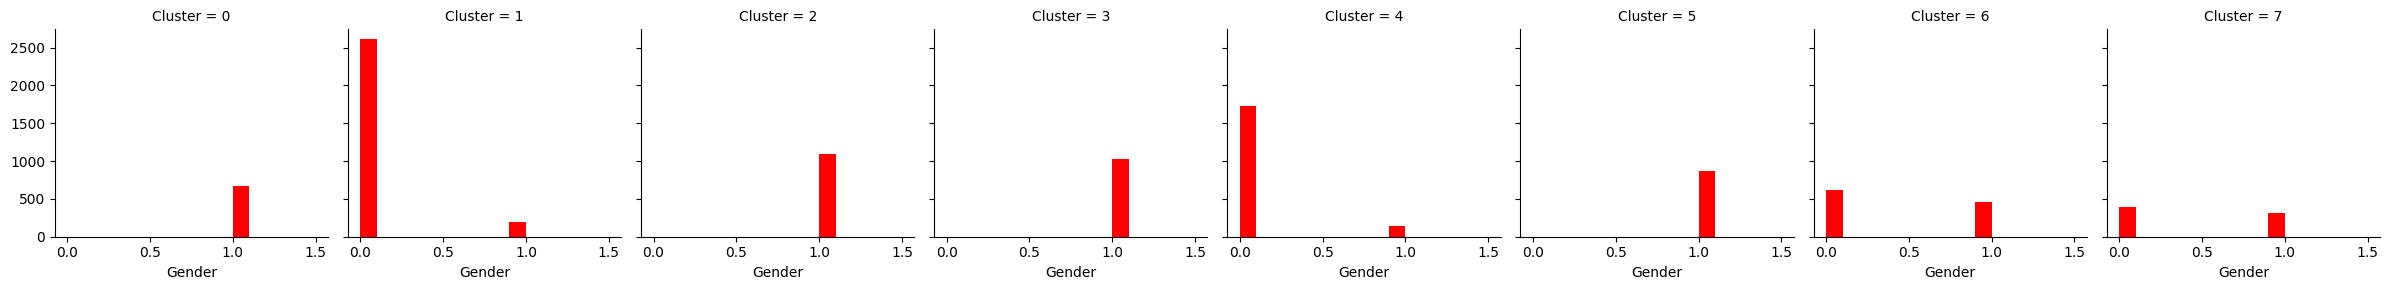

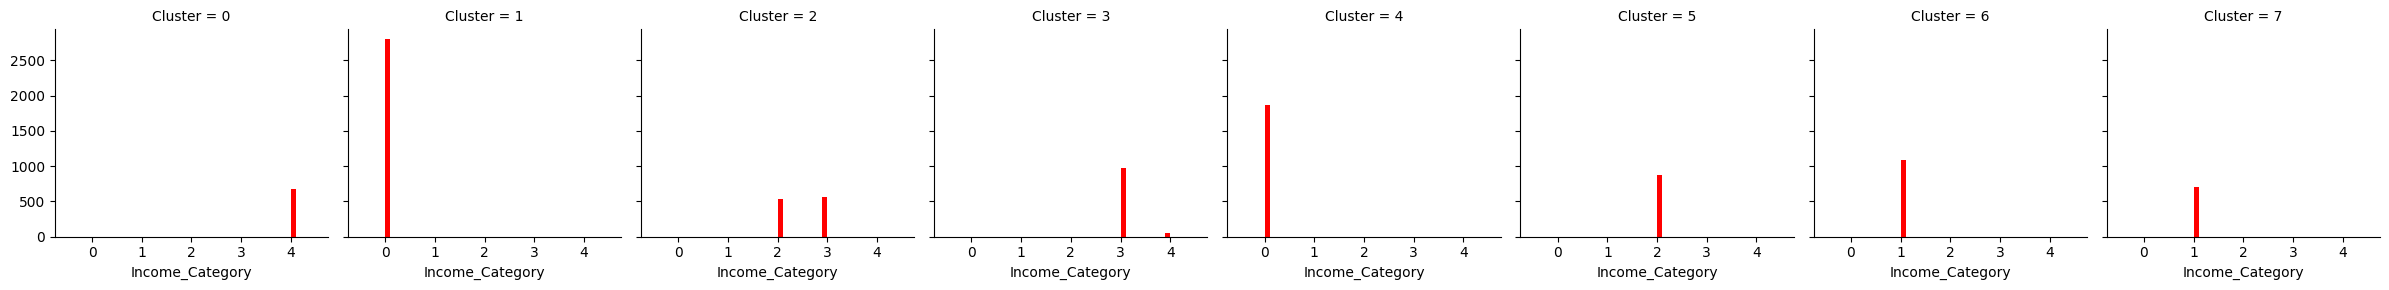

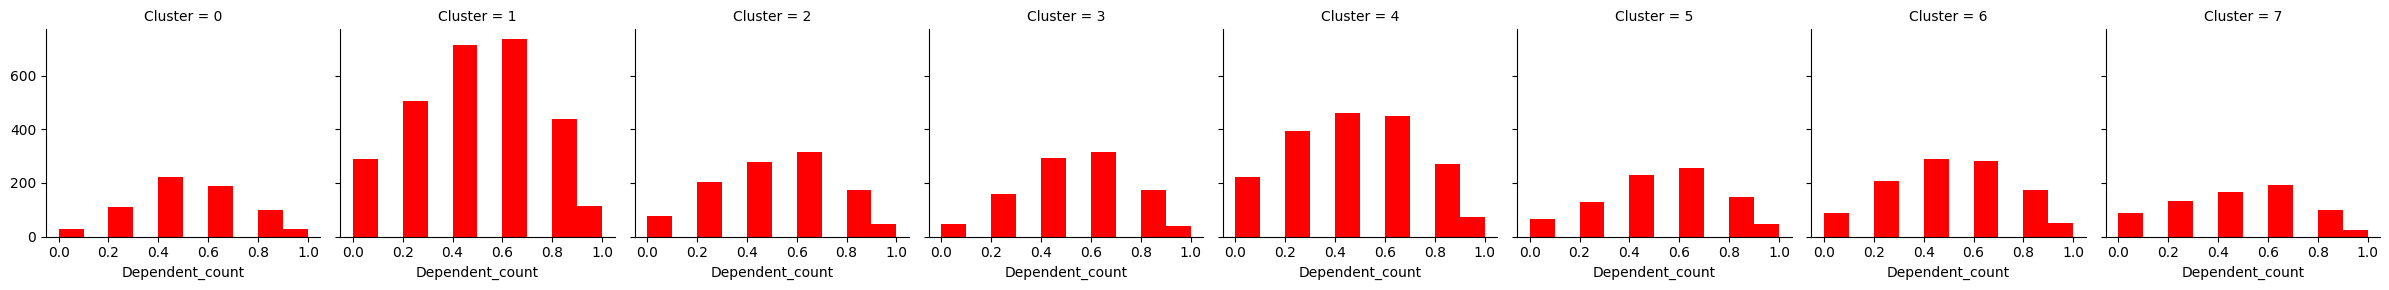

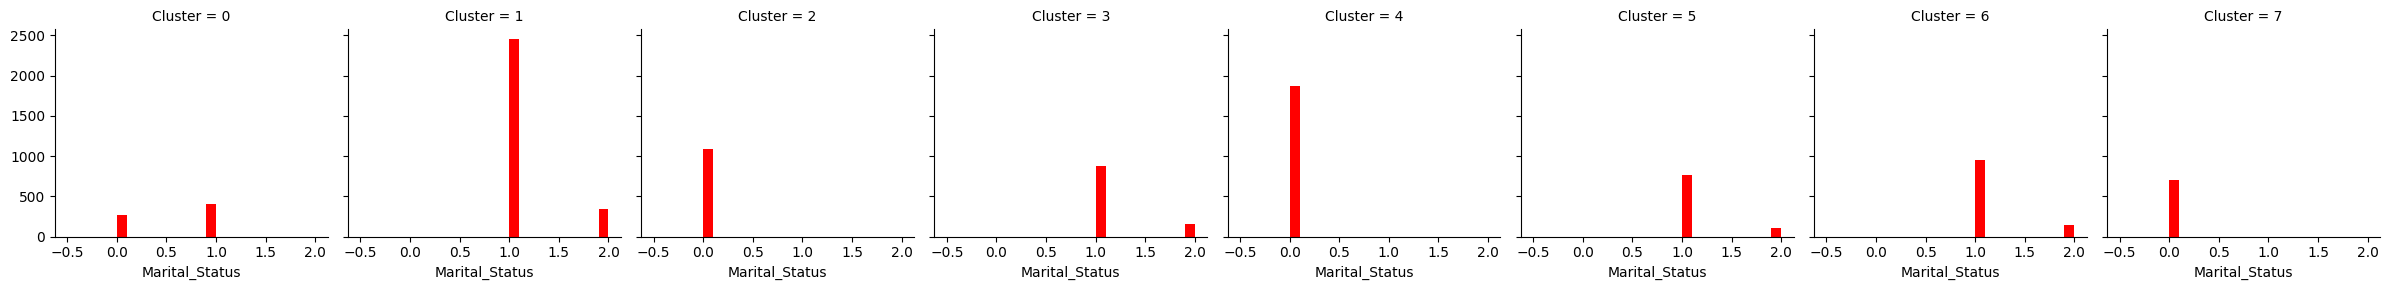

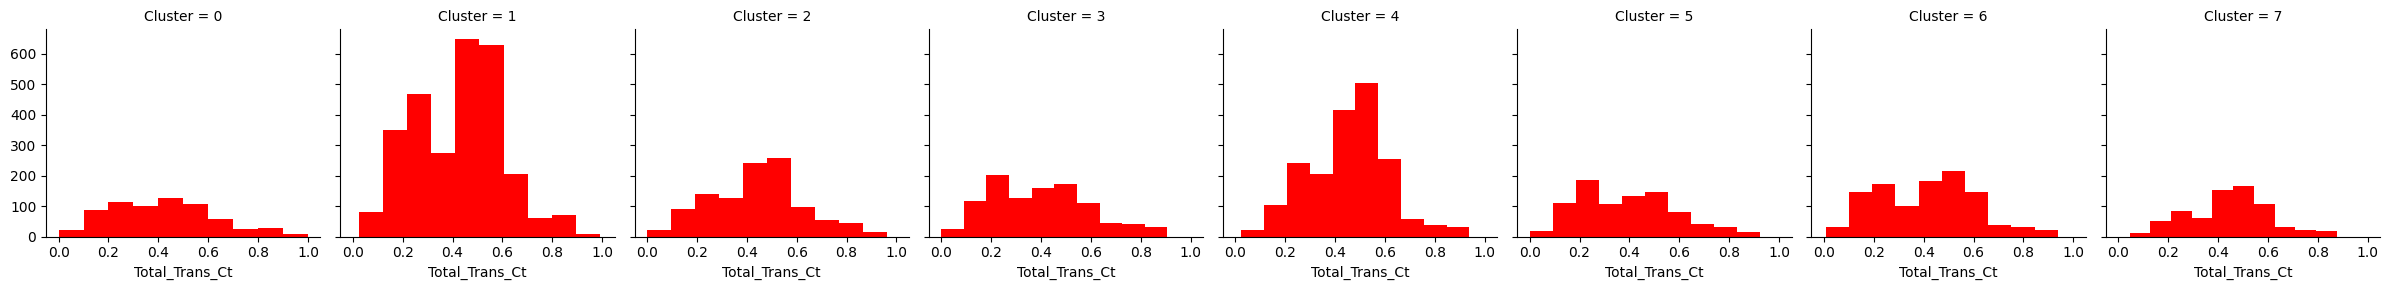

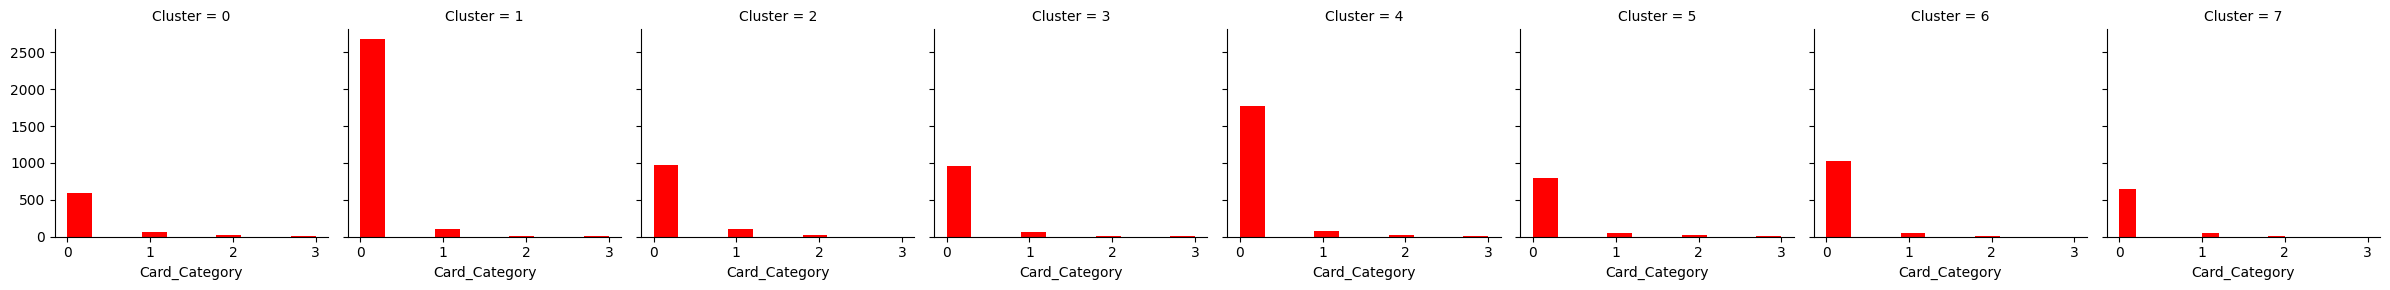

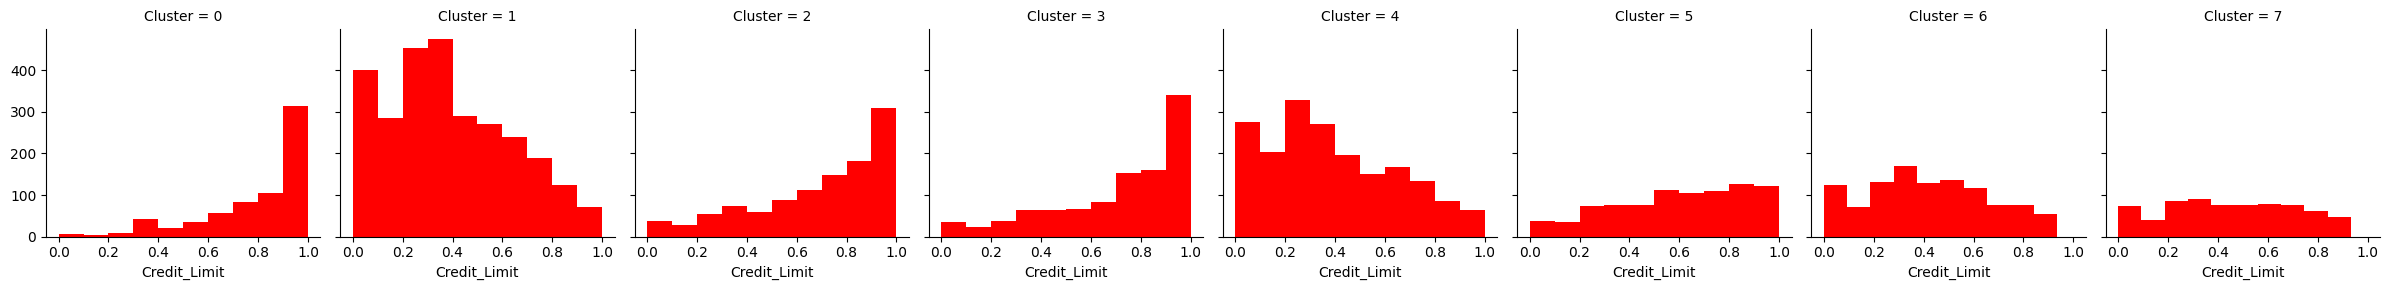

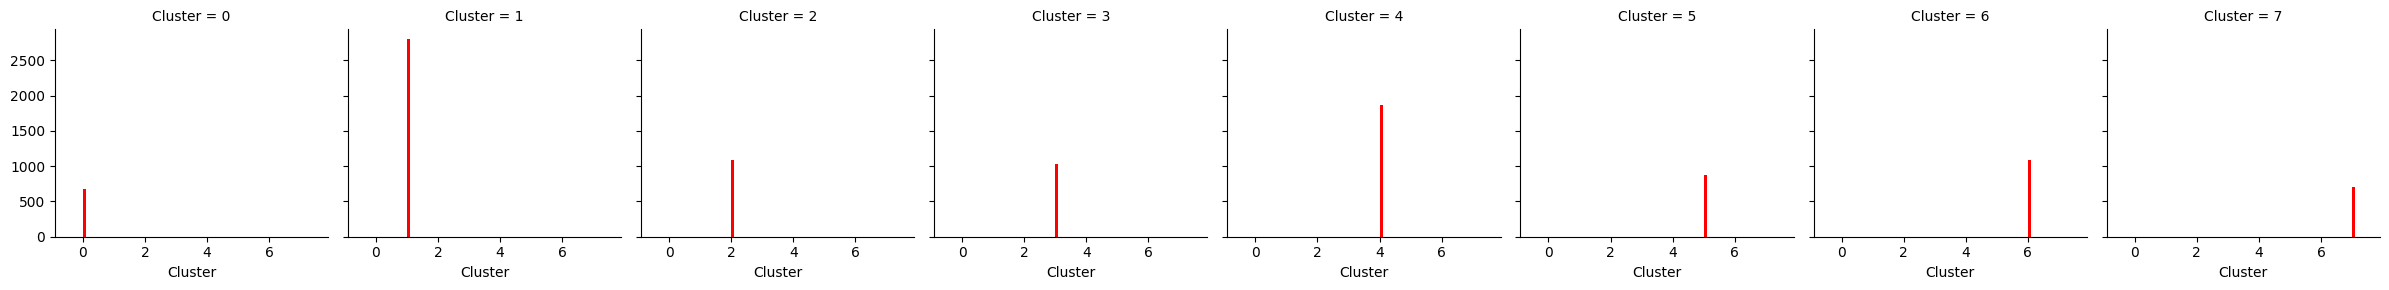

In [33]:
for c in demo_df:
    g = sns.FacetGrid(demo_df, col='Cluster')
    g.map(plt.hist, c, color = "red")

In [36]:
for k in range(7):
    print(f'cluster nb : {k}')
    print(demo_df[demo_df.Cluster == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
       Customer_Age  Gender  Income_Category  Dependent_count  Marital_Status  \
count    675.000000   675.0            675.0       675.000000      675.000000   
mean       0.460331     1.0              4.0         0.491259        0.594074   
min        0.000000     1.0              4.0         0.000000        0.000000   
max        0.765957     1.0              4.0         1.000000        1.000000   

       Total_Trans_Ct  Card_Category  Credit_Limit  
count       675.00000     675.000000    675.000000  
mean          0.41625       0.154074      0.805429  
min           0.00000       0.000000      0.000000  
max           1.00000       3.000000      1.000000  



cluster nb : 1
       Customer_Age     Gender  Income_Category  Dependent_count  \
count   2800.000000  2800.0000           2800.0      2800.000000   
mean       0.435084     0.0675              0.0         0.462429   
min        0.000000     0.0000              0.0         0.000000   
max        0.936170     

In [50]:
demo_df[demo_df.Cluster == 0].describe().iloc[[0, 1, 3,7], :-1]


,Customer_Age,Gender,Income_Category,Dependent_count,Marital_Status,Total_Trans_Ct,Card_Category,Credit_Limit
count,675.000000,675.0,675.0,675.000000,675.000000,675.00000,675.000000,675.000000
mean,0.460331,1.0,4.0,0.491259,0.594074,0.41625,0.154074,0.805429
min,0.000000,1.0,4.0,0.000000,0.000000,0.00000,0.000000,0.000000
max,0.765957,1.0,4.0,1.000000,1.000000,1.00000,3.000000,1.000000


* In Cluster 0 -
This cluster appears to represent a group of customers with moderate to high credit limits, lower to moderate transaction activity.
The uniformity in gender indicates that this cluster exclusively represents the male segment.
The slight majority in marital status suggests a predominance of married customers, and the dependent count indicates that most customers likely have only one dependent.

In [51]:
demo_df[demo_df.Cluster == 1].describe().iloc[[0, 1, 3,7], :-1]


,Customer_Age,Gender,Income_Category,Dependent_count,Marital_Status,Total_Trans_Ct,Card_Category,Credit_Limit
count,2800.000000,2800.0000,2800.0,2800.000000,2800.000000,2800.000000,2800.00,2800.000000
mean,0.435084,0.0675,0.0,0.462429,1.123929,0.422489,0.05,0.386579
min,0.000000,0.0000,0.0,0.000000,1.000000,0.023256,0.00,0.000000
max,0.936170,1.0000,0.0,1.000000,2.000000,0.992248,3.00,1.000000


* Cluster 1 
Represents predominantly male customers with a mean normalized age of 0.43 and max of 0.93 , indicating a group ranging from mid-aged to older individuals. These customers have an income of less than 40K, are primarily married or divorced, and typically have only one dependent. The uniformity in gender and specific demographic traits suggest this cluster comprises lower-income males with limited familial responsibilities.

In [52]:
demo_df[demo_df.Cluster ==2 ].describe().iloc[[0, 1, 3,7], :-1]


,Customer_Age,Gender,Income_Category,Dependent_count,Marital_Status,Total_Trans_Ct,Card_Category,Credit_Limit
count,1092.000000,1092.0,1092.000000,1092.000000,1092.0,1092.000000,1092.00000,1092.000000
mean,0.434631,1.0,2.513736,0.481319,0.0,0.441378,0.14011,0.695535
min,0.000000,1.0,2.000000,0.000000,0.0,0.000000,0.00000,0.000000
max,0.787234,1.0,3.000000,1.000000,0.0,0.961240,3.00000,1.000000


* Cluster 2 
Represents male customers with a mean normalized age of 0.43 and max value of 0.79, indicating a group of mid-aged individuals. These customers have an income between 60K to 120K, suggesting a higher-income segment. The majority are single, with a maximum of one dependent, indicating minimal familial responsibilities. This cluster likely represents financially stable, single male customers with moderate to high incomes.

In [53]:
demo_df[demo_df.Cluster == 3].describe().iloc[[0, 1, 3,7], :-1]


,Customer_Age,Gender,Income_Category,Dependent_count,Marital_Status,Total_Trans_Ct,Card_Category,Credit_Limit
count,1026.000000,1026.0,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000
mean,0.432126,1.0,3.050682,0.503509,1.151072,0.395576,0.084795,0.718461
min,0.021277,1.0,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,0.787234,1.0,4.000000,1.000000,2.000000,0.906977,3.000000,1.000000


* Cluster 3 -
Consists of male customers with a mean normalized age of 0.43 and max of 0.78 and incomes ranging from 80K to over 120K, indicating a high-income segment. The majority are married or divorced, with a maximum of one dependent and a mean dependent count of 0.53. Transaction activity in this cluster is moderate, with a mean transaction count of 0.3955 and a maximum of 0.9069, suggesting lower to moderate engagement with the card. This cluster likely represents high-income male customers with moderate transaction activity and minimal dependents.

In [54]:
demo_df[demo_df.Cluster == 4].describe().iloc[[0, 1, 3,7], :-1]


,Customer_Age,Gender,Income_Category,Dependent_count,Marital_Status,Total_Trans_Ct,Card_Category,Credit_Limit
count,1873.000000,1873.000000,1873.0,1873.000000,1873.0,1873.000000,1873.000000,1873.000000
mean,0.426770,0.074746,0.0,0.439616,0.0,0.454914,0.072611,0.388456
min,0.000000,0.000000,0.0,0.000000,0.0,0.023256,0.000000,0.000000
max,0.829787,1.000000,0.0,1.000000,0.0,0.937984,3.000000,1.000000


* Cluster 4 - 
consists of male customers with a mean normalized age of 0.43 max of 0.83, indicating a group of mid-aged individuals. These customers have an income of less than 40K, suggesting a lower-income segment. The majority are single, with a maximum of one dependent and a mean dependent count of 0.43. Transaction activity is moderate, with a mean transaction count of 0.45 and a maximum of 0.937, indicating relatively high engagement. Customers in this cluster also have a maximum credit limit of 1, with a mean of 0.3884, suggesting a generally low to moderate credit limit. This cluster likely represents lower-income, single male customers with moderate transaction activity and limited credit availability.

In [55]:
demo_df[demo_df.Cluster == 5].describe().iloc[[0, 1, 3,7], :-1]


,Customer_Age,Gender,Income_Category,Dependent_count,Marital_Status,Total_Trans_Ct,Card_Category,Credit_Limit
count,871.000000,871.0,871.0,871.000000,871.000000,871.000000,871.00000,871.00000
mean,0.422845,1.0,2.0,0.497819,1.123995,0.389893,0.10907,0.59819
min,0.021277,1.0,2.0,0.000000,1.000000,0.000000,0.00000,0.00000
max,0.787234,1.0,2.0,1.000000,2.000000,0.922481,3.00000,1.00000


* Cluster 5 -
Also consist mid age customer and incomes between 60K to 80K. The majority have one dependent  and a mix of married or divorced. Transaction activity is moderate, with a mean of 0.39 and a maximum of 0.92, while credit limits range from low to moderate (mean 0.60). This cluster represents mid-income, male customers with moderate credit limits and transaction activity.

In [56]:
demo_df[demo_df.Cluster == 6].describe().iloc[[0, 1, 3,7], :-1]


,Customer_Age,Gender,Income_Category,Dependent_count,Marital_Status,Total_Trans_Ct,Card_Category,Credit_Limit
count,1086.000000,1086.000000,1086.0,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000
mean,0.431938,0.427256,1.0,0.472192,1.127072,0.414643,0.066298,0.418680
min,0.000000,0.000000,1.0,0.000000,1.000000,0.007752,0.000000,0.000000
max,1.000000,1.000000,1.0,1.000000,2.000000,0.937984,3.000000,0.933976


* Cluster 6 -
 consists of male customers with a mean age of 0.43 and incomes between 40K to 60K. The majority have one dependent and a mix of marital statuses, indicating a combination of married and divorced. Transaction activity is moderate, with a mean of 0.41 and a maximum of 0.94, while credit limits range from low to moderate. This cluster likely represents male customers with mid-range incomes, moderate transaction activity, and a mix of marital statuses and dependents.

In [57]:
demo_df[demo_df.Cluster == 7].describe().iloc[[0, 1, 3,7], :-1]


,Customer_Age,Gender,Income_Category,Dependent_count,Marital_Status,Total_Trans_Ct,Card_Category,Credit_Limit
count,704.000000,704.000000,704.0,704.000000,704.0,704.000000,704.000000,704.000000
mean,0.420364,0.443182,1.0,0.445455,0.0,0.444437,0.085227,0.454287
min,0.000000,0.000000,1.0,0.000000,0.0,0.046512,0.000000,0.000000
max,0.829787,1.000000,1.0,1.000000,0.0,0.875969,2.000000,0.933976


Cluster 7 - consists of male customers with a mean age of 0.42 (max 0.83) and incomes between 40K to 60K. The majority have one dependent and are likely single . Transaction activity is moderate, with a mean of 0.44 and a maximum of 0.88, while credit limits range from low to moderate with mean 0.45. This cluster represents male customers with mid-range incomes, moderate transaction activity, and minimal familial responsibilities.

Overall,these clusters represent various segments of male customers across different income groups, marital statuses, and credit behaviors, with income level and transaction activity being key differentiators in how they interact with their credit accounts

In [37]:
X=new_df.drop('Attrition_Flag',axis=1)
y= new_df['Attrition_Flag']


In [61]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=69)
print(f"Befor applying SMOTE: { X_train.shape},{y_train.shape}")
sm = SMOTE(random_state = 42, sampling_strategy = 1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(f"After applying SMOTE: {X_train.shape},{y_train.shape}")


Befor applying SMOTE: (8101, 19),(8101,)
After applying SMOTE: (13584, 19),(13584,)


In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(f"Accuracy Score for RandomForest Classifier: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification Report for RandomForest Classifier:\n {classification_report(y_test,y_pred)}")
print(f"Confusion_Matrix of RandomForest Classifier:\n {confusion_matrix(y_test,y_pred,labels=[0,1])}")


Accuracy Score for RandomForest Classifier: 0.9536031589338598

Classification Report for RandomForest Classifier:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1708
           1       0.85      0.86      0.85       318

    accuracy                           0.95      2026
   macro avg       0.91      0.92      0.91      2026
weighted avg       0.95      0.95      0.95      2026

Confusion_Matrix of RandomForest Classifier:
 [[1658   50]
 [  44  274]]


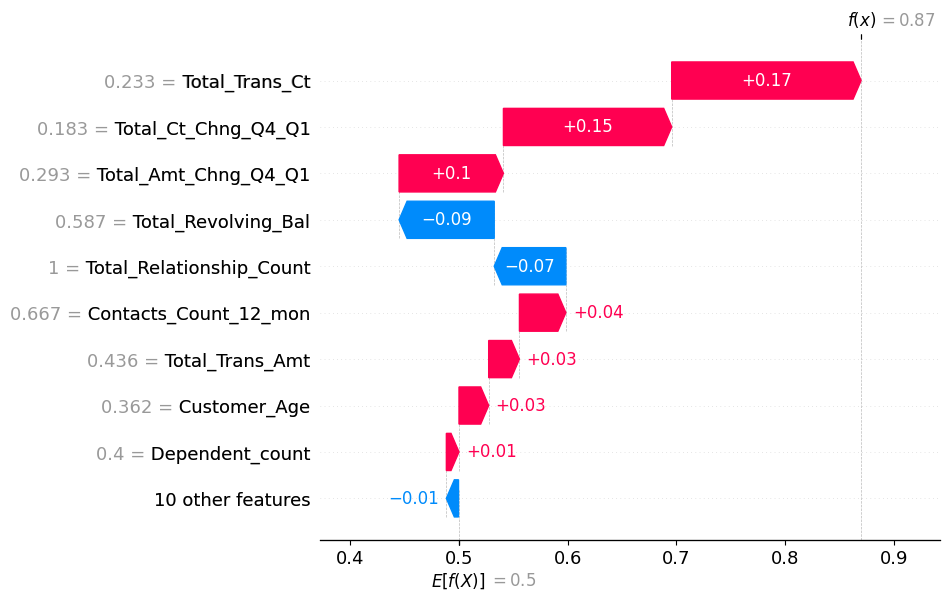

In [65]:
explainer = TreeExplainer(rf_clf)
sv = explainer(X_train)
exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X_train.values, 
                  feature_names=X_train.columns)
idx = 0
waterfall(exp[idx])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred_dt = dt_clf.predict(X_test)

print(f"Accuracy Score for DecisionTree Classifier: {accuracy_score(y_test,y_pred_dt)}\n")
print(f"Classification Report for DecisionTree Classifier:\n {classification_report(y_test,y_pred_dt)}")
print(f"Confusion_Matrix of DecisionTree Classifier:\n {confusion_matrix(y_test,y_pred_dt,labels=[0,1])}")

Accuracy Score for DecisionTree Classifier: 0.9175715695952616

Classification Report for DecisionTree Classifier:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1708
           1       0.71      0.80      0.75       318

    accuracy                           0.92      2026
   macro avg       0.84      0.87      0.85      2026
weighted avg       0.92      0.92      0.92      2026

Confusion_Matrix of DecisionTree Classifier:
 [[1606  102]
 [  65  253]]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred_lr = lr_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))
print(f"Accuracy Score for LogisticRegression Classifier{accuracy_score(y_test,y_pred_lr)}\n")
print(f"Classification Report for LogisticRegression Classifier:\n{classification_report(y_test,y_pred_lr)}\n")
print(f"Confusion_Matrix of LogisticRegression Classifier:\n{classification_report(y_test,y_pred_lr,labels=[0,1])}\n")

0.861796643632774
Accuracy Score for LogisticRegression Classifier0.861796643632774

Classification Report for LogisticRegression Classifier:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1708
           1       0.54      0.83      0.65       318

    accuracy                           0.86      2026
   macro avg       0.75      0.85      0.78      2026
weighted avg       0.90      0.86      0.87      2026


Confusion_Matrix of LogisticRegression Classifier:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1708
           1       0.54      0.83      0.65       318

    accuracy                           0.86      2026
   macro avg       0.75      0.85      0.78      2026
weighted avg       0.90      0.86      0.87      2026




In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
y_pred_xgb= xgb_clf.predict(X_test)

print(f"Accuracy Score for XGBClassifier: {accuracy_score(y_test,y_pred_xgb)}\n")
print(f"Classification Report for XGBClassifier:\n {classification_report(y_test,y_pred_xgb)}")
print(f"Confusion_Matrix of XGBClassifier:\n {confusion_matrix(y_test,y_pred_xgb,labels=[0,1])}")

Accuracy Score for XGBClassifier: 0.9738400789733465

Classification Report for XGBClassifier:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1708
           1       0.93      0.91      0.92       318

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026

Confusion_Matrix of XGBClassifier:
 [[1685   23]
 [  30  288]]
